In [2]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
import email
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\win10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\win10\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

In [4]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.options.mode.chained_assignment = None

In [5]:
df = pd.read_csv('C:/Users/win10/OneDrive/Desktop/Email/machine_learning/dataset/emails.csv', nrows=35000)

In [6]:
emails = list(map(email.parser.Parser().parsestr,df['message']))

headings  = emails[0].keys()

for key in headings:
    df[key] = [doc[key] for doc in emails]

In [7]:
df.head()

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Leah Van Arsdall,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Randall L Gay,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Greg Piper,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf


In [8]:
def get_raw_text(emails):
    email_text = []
    for email in emails.walk():
        if email.get_content_type() == 'text/plain':
            email_text.append(email.get_payload())
    return ''.join(email_text)

df['body'] = list(map(get_raw_text, emails))
df.head()
df['user'] = df['file'].map(lambda x: x.split('/')[0])

In [9]:
def clean_column(data):
    if data is not None:
        stopwords_list = stopwords.words('english')
        #exclusions = ['RE:', 'Re:', 're:']
        #exclusions = '|'.join(exclusions)
        data =  data.lower()
        data = re.sub('re:', '', data)
        data = re.sub('-', '', data)
        data = re.sub('_', '', data)
        # Remove data between square brackets
        data =re.sub('\[[^]]*\]', '', data)
        # removes punctuation
        data = re.sub(r'[^\w\s]','',data)
        data = re.sub(r'\n',' ',data)
        data = re.sub(r'[0-9]+','',data)
        # strip html 
        p = re.compile(r'<.*?>')
        data = re.sub(r"\'ve", " have ", data)
        data = re.sub(r"can't", "cannot ", data)
        data = re.sub(r"n't", " not ", data)
        data = re.sub(r"I'm", "I am", data)
        data = re.sub(r" m ", " am ", data)
        data = re.sub(r"\'re", " are ", data)
        data = re.sub(r"\'d", " would ", data)
        data = re.sub(r"\'ll", " will ", data)
        data = re.sub('forwarded by phillip k allenhouect on    pm', '',data)
        data = re.sub(r"httpitcappscorpenroncomsrrsauthemaillinkaspidpage", "", data)
        
        data = p.sub('', data)
        if 'forwarded by:' in data:
            data = data.split('subject')[1]
        data = data.strip()
        return data
    return 'No Subject'

df['Subject_new'] = df['Subject'].apply(clean_column)
df['body_new'] = df['body'].apply(clean_column)

In [10]:
df['body_new'].head(5)

0                                 here is our forecast
1    traveling to have a business meeting takes the...
2                           test successful  way to go
3    randy   can you send me a schedule of the sala...
4                            lets shoot for tuesday at
Name: body_new, dtype: object

In [11]:
print(" Shape of training dataframe: ", df['body_new'].shape)

 Shape of training dataframe:  (35000,)


In [12]:
df.drop_duplicates()
print(" Shape of dataframe after dropping duplicates: ", df.shape)

 Shape of dataframe after dropping duplicates:  (35000, 21)


In [13]:
#Null values

null= df.isnull().sum().sort_values(ascending=False)
total =df.shape[0]
percent_missing= (df.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})
 
print ("Null Values in each column:\n", missing_data)

Null Values in each column:
                   column name  Total missing  Percent missing
0                          To           1807         0.051629
1                      X-From              5         0.000143
2                    X-Folder              5         0.000143
3                  X-FileName              5         0.000143
4                Mime-Version              5         0.000143
5                Content-Type              5         0.000143
6   Content-Transfer-Encoding              5         0.000143
7                    X-Origin              5         0.000143
8                        X-To              5         0.000143
9                        X-cc              5         0.000143
10                      X-bcc              5         0.000143
11                Subject_new              0         0.000000
12                       user              0         0.000000
13                       body              0         0.000000
14                       file            

In [14]:
import vaderSentiment
# calling SentimentIntensityAnalyzer object
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [15]:
def sentiment_analyzer_score(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [16]:
email  = "I would love to watch the magic show again"
email2 = "What the hell they have made. Pathetic!"
email3 = " I do not know what to do"  
print (sentiment_analyzer_score(email))
print (sentiment_analyzer_score(email2))
print (sentiment_analyzer_score(email3))

I would love to watch the magic show again {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.6369}
None
What the hell they have made. Pathetic!- {'neg': 0.632, 'neu': 0.368, 'pos': 0.0, 'compound': -0.8622}
None
 I do not know what to do--------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None


In [17]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
words_descriptions = df['body_new'].apply(tokenizer.tokenize)
words_descriptions.head()

0                            [here, is, our, forecast]
1    [traveling, to, have, a, business, meeting, ta...
2                      [test, successful, way, to, go]
3    [randy, can, you, send, me, a, schedule, of, t...
4                      [lets, shoot, for, tuesday, at]
Name: body_new, dtype: object

In [18]:
all_words = [word for tokens in words_descriptions for word in tokens]
df['description_lengths']= [len(tokens) for tokens in words_descriptions]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))

7847246 words total, with a vocabulary size of 108051


In [19]:
# Checking most common words
from collections import Counter
count_all_words = Counter(all_words)
count_all_words.most_common(100)

[('the', 321262),
 ('to', 245100),
 ('and', 155597),
 ('of', 126453),
 ('a', 126388),
 ('in', 104555),
 ('for', 95292),
 ('you', 85394),
 ('on', 82042),
 ('is', 75018),
 ('i', 74111),
 ('that', 65606),
 ('this', 60145),
 ('be', 56274),
 ('will', 55608),
 ('with', 49929),
 ('have', 46854),
 ('from', 46276),
 ('we', 44403),
 ('at', 43029),
 ('as', 41171),
 ('are', 40911),
 ('your', 37455),
 ('it', 37131),
 ('by', 35571),
 ('am', 33501),
 ('if', 32735),
 ('or', 32353),
 ('enron', 30965),
 ('not', 30049),
 ('pm', 28337),
 ('subject', 27761),
 ('please', 24195),
 ('he', 22758),
 ('all', 21891),
 ('has', 21418),
 ('was', 21033),
 ('me', 20862),
 ('an', 20292),
 ('but', 20058),
 ('cc', 20029),
 ('can', 19262),
 ('would', 19008),
 ('our', 18197),
 ('any', 17283),
 ('time', 16226),
 ('email', 15967),
 ('new', 15864),
 ('up', 15218),
 ('do', 15215),
 ('know', 14803),
 ('week', 14509),
 ('my', 14196),
 ('so', 14185),
 ('about', 14058),
 ('they', 13932),
 ('more', 13865),
 ('out', 13818),
 ('been'

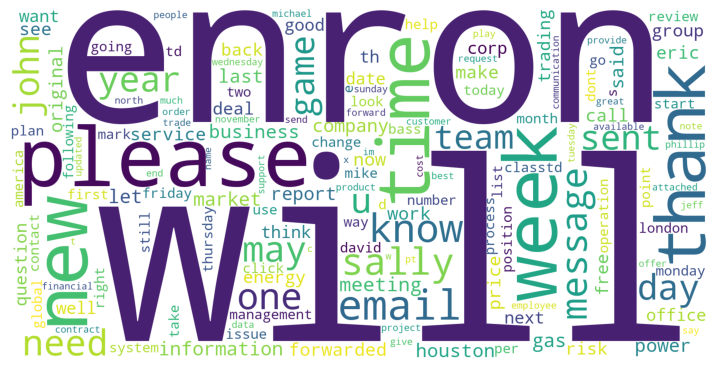

In [20]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
to_add = ['FW', 'ga', 'httpitcappscorpenroncomsrrsauthemaillinkaspidpage', 'cc', 'aa', 'aaa', 'aaaa',
         'hou', 'cc', 'etc', 'subject', 'pm']

for i in to_add:
    stopwords.add(i)

#Visualise Email Subject

wordcloud = WordCloud(
                          collocations = False,
                          width=1600, height=800,
                          background_color='white',
                          stopwords=stopwords,
                          max_words=150,
                          #max_font_size=40, 
                          random_state=42
                         ).generate(' '.join(df['body_new'])) # can't pass a series, needs to be strings and function computes frequencies

print(wordcloud)
plt.figure(figsize=(9,8))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [21]:
df['scores'] = df['body_new'].apply(lambda review: analyser.polarity_scores(review))
df.head()

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,X-bcc,X-Folder,X-Origin,X-FileName,body,user,Subject_new,body_new,description_lengths,scores
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Here is our forecast\n\n,allen-p,,here is our forecast,4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,...,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...,allen-p,,traveling to have a business meeting takes the...,139,"{'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'comp..."
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,1.0,text/plain; charset=us-ascii,7bit,...,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,test successful. way to go!!!,allen-p,test,test successful way to go,5,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp..."
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Randy,\n\n Can you send me a schedule of the s...",allen-p,,randy can you send me a schedule of the sala...,34,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,1.0,text/plain; charset=us-ascii,7bit,...,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,Let's shoot for Tuesday at 11:45.,allen-p,hello,lets shoot for tuesday at,5,"{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'comp..."


In [22]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,X-Folder,X-Origin,X-FileName,body,user,Subject_new,body_new,description_lengths,scores,compound
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Here is our forecast\n\n,allen-p,,here is our forecast,4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,...,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...,allen-p,,traveling to have a business meeting takes the...,139,"{'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'comp...",0.9313
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,1.0,text/plain; charset=us-ascii,7bit,...,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,test successful. way to go!!!,allen-p,test,test successful way to go,5,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...",0.5859
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Randy,\n\n Can you send me a schedule of the s...",allen-p,,randy can you send me a schedule of the sala...,34,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,1.0,text/plain; charset=us-ascii,7bit,...,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,Let's shoot for Tuesday at 11:45.,allen-p,hello,lets shoot for tuesday at,5,"{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'comp...",-0.3400


In [23]:
def Sentimnt(x):
    if x>= 0.05:
        return "Positive"
    elif x<= -0.05:
        return "Negative"
    else:
        return "Neutral"
#df['Sentiment'] = df['compound'].apply(lambda c: 'positive' if c >=0.00  else 'negative')
df['Sentiment'] = df['compound'].apply(Sentimnt)


df.head()

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,X-Origin,X-FileName,body,user,Subject_new,body_new,description_lengths,scores,compound,Sentiment
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,Allen-P,pallen (Non-Privileged).pst,Here is our forecast\n\n,allen-p,,here is our forecast,4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,...,Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...,allen-p,,traveling to have a business meeting takes the...,139,"{'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'comp...",0.9313,Positive
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,1.0,text/plain; charset=us-ascii,7bit,...,Allen-P,pallen.nsf,test successful. way to go!!!,allen-p,test,test successful way to go,5,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...",0.5859,Positive
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,Allen-P,pallen.nsf,"Randy,\n\n Can you send me a schedule of the s...",allen-p,,randy can you send me a schedule of the sala...,34,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,1.0,text/plain; charset=us-ascii,7bit,...,Allen-P,pallen.nsf,Let's shoot for Tuesday at 11:45.,allen-p,hello,lets shoot for tuesday at,5,"{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'comp...",-0.3400,Negative


In [24]:
import plotly.graph_objs as go

In [25]:
var1 = df.groupby('Sentiment').count()['body_new'].reset_index().sort_values(by='body_new',ascending=False)
go.Figure(go.Funnelarea(
    text =var1.Sentiment,
    values = var1.body_new,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))

In [26]:
df['temp_list'] = df['body_new'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']


In [27]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

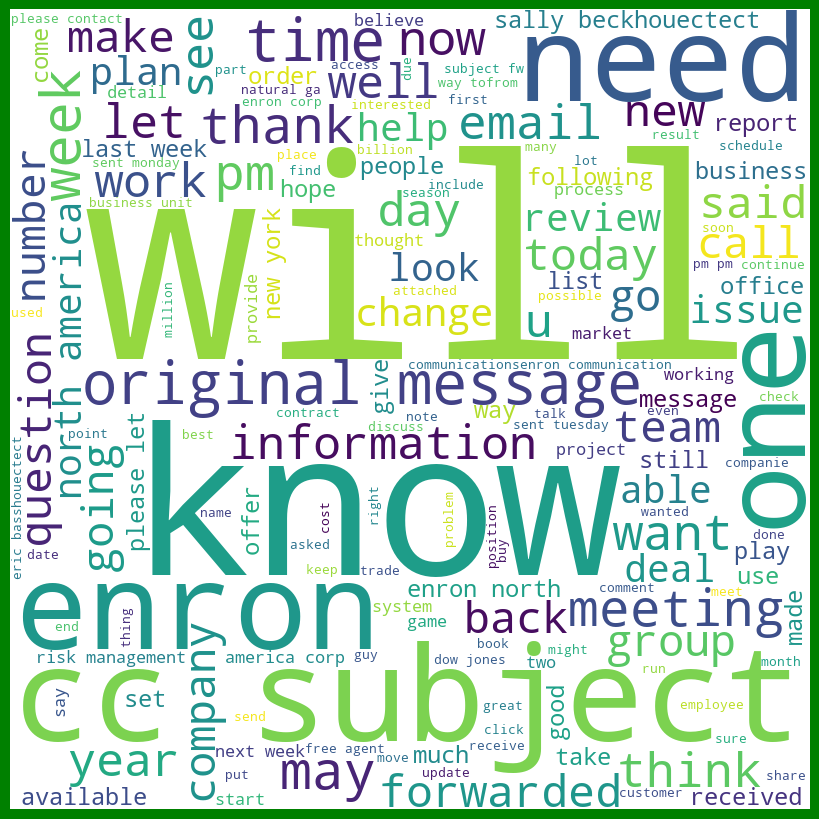

In [28]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
df_positive = df[df["Sentiment"]== "Positive"] 
# iterate through the csv file 
for val in df_positive.body_new: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = "green") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

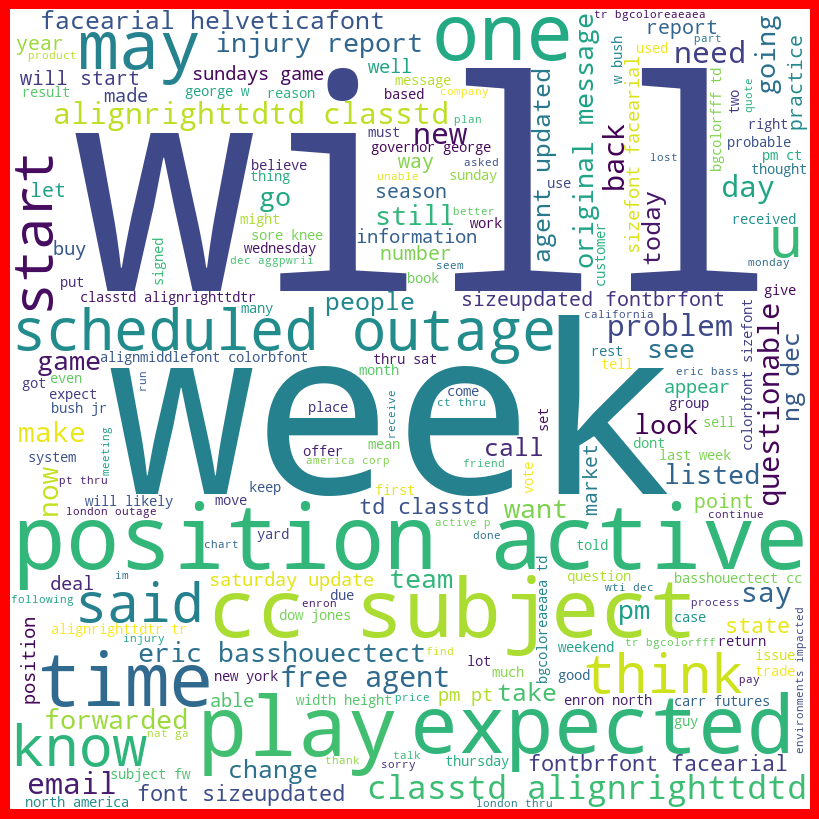

In [29]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
df_positive = df[df["Sentiment"]== "Negative"] 
# iterate through the csv file 
for val in df_positive.body_new: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = "red") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [31]:
import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob, Word, Blobber

In [32]:
email = "I would love to meet you again"
TextBlob(email).sentiment 

Sentiment(polarity=0.5, subjectivity=0.6)

In [33]:
df['TB_score']= df.body_new.apply(lambda x: TextBlob(x).sentiment)
df.head()

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,body,user,Subject_new,body_new,description_lengths,scores,compound,Sentiment,temp_list,TB_score
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,Here is our forecast\n\n,allen-p,,here is our forecast,4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"[here, is, our, forecast]","(0.0, 0.0)"
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,...,Traveling to have a business meeting takes the...,allen-p,,traveling to have a business meeting takes the...,139,"{'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'comp...",0.9313,Positive,"[traveling, to, have, a, business, meeting, ta...","(0.18181818181818182, 0.603030303030303)"
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,1.0,text/plain; charset=us-ascii,7bit,...,test successful. way to go!!!,allen-p,test,test successful way to go,5,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...",0.5859,Positive,"[test, successful, way, to, go]","(0.75, 0.95)"
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,"Randy,\n\n Can you send me a schedule of the s...",allen-p,,randy can you send me a schedule of the sala...,34,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"[randy, can, you, send, me, a, schedule, of, t...","(0.0, 0.0)"
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,1.0,text/plain; charset=us-ascii,7bit,...,Let's shoot for Tuesday at 11:45.,allen-p,hello,lets shoot for tuesday at,5,"{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'comp...",-0.3400,Negative,"[lets, shoot, for, tuesday, at]","(0.0, 0.0)"


In [34]:
df['TB_sentiment'] = df['body_new'].apply(lambda x: TextBlob(x).sentiment[0])
df.head()

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,user,Subject_new,body_new,description_lengths,scores,compound,Sentiment,temp_list,TB_score,TB_sentiment
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,allen-p,,here is our forecast,4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"[here, is, our, forecast]","(0.0, 0.0)",0.000000
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,...,allen-p,,traveling to have a business meeting takes the...,139,"{'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'comp...",0.9313,Positive,"[traveling, to, have, a, business, meeting, ta...","(0.18181818181818182, 0.603030303030303)",0.181818
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,1.0,text/plain; charset=us-ascii,7bit,...,allen-p,test,test successful way to go,5,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...",0.5859,Positive,"[test, successful, way, to, go]","(0.75, 0.95)",0.750000
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,allen-p,,randy can you send me a schedule of the sala...,34,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"[randy, can, you, send, me, a, schedule, of, t...","(0.0, 0.0)",0.000000
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,1.0,text/plain; charset=us-ascii,7bit,...,allen-p,hello,lets shoot for tuesday at,5,"{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'comp...",-0.3400,Negative,"[lets, shoot, for, tuesday, at]","(0.0, 0.0)",0.000000


In [35]:
from nrclex import NRCLex
email = NRCLex('Good work to the team')
#Return affect dictionary
print(email.affect_dict)
#Return raw emotional counts
print("\n",email.raw_emotion_scores)
#Return highest emotions
print("\n", email.top_emotions)
#Return affect frequencies
print("\n",email.affect_frequencies)

{'team': ['trust']}

 {'trust': 1}

 [('trust', 1.0)]

 {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 1.0, 'surprise': 0.0, 'positive': 0.0, 'negative': 0.0, 'sadness': 0.0, 'disgust': 0.0, 'joy': 0.0}


In [36]:
def emotion(x):
    text = NRCLex(x)
    if text.top_emotions[0][1] == 0.0:
        return "No emotion"
    else:
        return text.top_emotions[0][0]
df['Emotion'] = df['body_new'].apply(emotion)
df.head()

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,Subject_new,body_new,description_lengths,scores,compound,Sentiment,temp_list,TB_score,TB_sentiment,Emotion
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,,here is our forecast,4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"[here, is, our, forecast]","(0.0, 0.0)",0.000000,trust
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,...,,traveling to have a business meeting takes the...,139,"{'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'comp...",0.9313,Positive,"[traveling, to, have, a, business, meeting, ta...","(0.18181818181818182, 0.603030303030303)",0.181818,positive
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,1.0,text/plain; charset=us-ascii,7bit,...,test,test successful way to go,5,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...",0.5859,Positive,"[test, successful, way, to, go]","(0.75, 0.95)",0.750000,trust
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,,randy can you send me a schedule of the sala...,34,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"[randy, can, you, send, me, a, schedule, of, t...","(0.0, 0.0)",0.000000,trust
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,1.0,text/plain; charset=us-ascii,7bit,...,hello,lets shoot for tuesday at,5,"{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'comp...",-0.3400,Negative,"[lets, shoot, for, tuesday, at]","(0.0, 0.0)",0.000000,fear


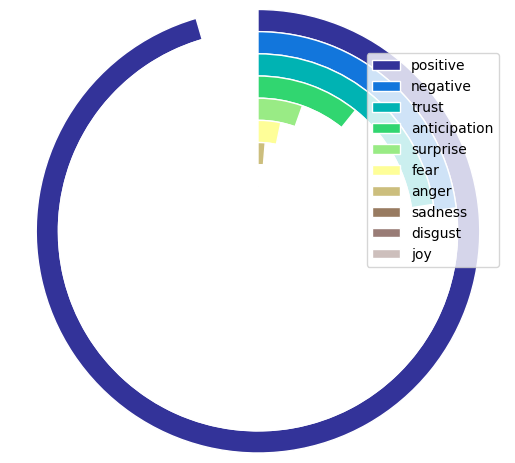

In [37]:
import matplotlib.pyplot as plt
from matplotlib import cm
from math import log10

df_chart = df[df.Emotion != "No emotion"]
labels = df_chart.Emotion.value_counts().index.tolist()
data = df_chart.Emotion.value_counts()
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)

#radius of donut chart
r = 1.5
#calculate width of each ring
w = r / n 

#create colors along a chosen colormap
colors = [cm.terrain(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["white", colors[i]])
    plt.setp(innerring, width = w, edgecolor = "white")

plt.legend()
plt.show()
